# EGRMGMT 590.10 Homework 2

*Due at 6:15pm ET on Thursday, February 7*

## Instructions

+ Make sure you have pandas, NumPy, SciPy, Matplotlib, seaborn, and scikit-learn installed before working on the assignment.
+ There are 12 exercises all of which require coding. Your grades are based on the accuracy of the results, not the code execution speed.
    + Exercise 1 to 6, 8, and 10 to 12: each is worth 0.5 points. 
    + Exercise 7: 1 point.
    + Exercise 9: 4 points.
+ Exercises are dependent on prior exercises. Please work on them in the pre-determined order.
+ Submit the .ipynb and .py files to Sakai before 6:15pm ET on Thursday, February 7.
+ Assignments handed in late will lose 1 point every 24-hour window after 6:15pm ET on Thursday, February 7.

## Dataset

**Dataset Information:**

The dataset is from the results of a chemical analysis of wines grown in the same region in Italy but derived from three    different cultivars. The first variable in the dataset indicates the cultivar. The remaining 13 variables are the quantities of 13 constituents found in each of the three types of wines.

0. Cultivar
1. Alcohol 
2. Malic acid 
3. Ash 
4. Alcalinity of ash 
5. Magnesium 
6. Total phenols 
7. Flavanoids 
8. Nonflavanoid phenols 
9. Proanthocyanins 
10. Color intensity 
11. Hue 
12. OD280/OD315 of diluted wines 
13. Proline 

**Dataset Source:**
https://archive.ics.uci.edu/ml/datasets/wine

## Exercises

**Exercise Overview**

+ We'll conduct cluster analysis using the 13 variables (i.e. excluding 'Cultivar') in the dataset and group wines into natural clusters. 

### Exercise 1 

+ Use the read_csv() function of pandas to read the wine dataset directly from its URL (https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data) to a pandas DataFrame df
+ Display the first five rows of data in df

In [208]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"
df = pd.read_csv(url, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Exercise 2

+ Rename the columns of df using a list ['Cultivar', 'Alcohol', 'MalicAcid', 'Ash', 'AlcalinityAsh', 'Magnesium', 'TotPhenols', 'Flavanoids', 'NonflavanoidPhenols', 'Proanthocyanins', 'ColorIntensity', 'Hue', 'OD280/OD315Diluted', 'Proline']
+ Display the last five rows of data in df

In [209]:
df.columns = ['Cultivar', 'Alcohol', 'MalicAcid', 'Ash', 'AlcalinityAsh', 'Magnesium', 'TotPhenols', 'Flavanoids', 'NonflavanoidPhenols', 'Proanthocyanins', 'ColorIntensity', 'Hue', 'OD280/OD315Diluted', 'Proline']
df.tail()

,Cultivar,Alcohol,MalicAcid,Ash,AlcalinityAsh,Magnesium,TotPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,OD280/OD315Diluted,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


### Exercise 3

+ Use the seaborn library to create a matrix of scatter plots for all the variables in df, excluding 'Cultivar'
+ Set the diagnal subplots as histograms for univariate distributions

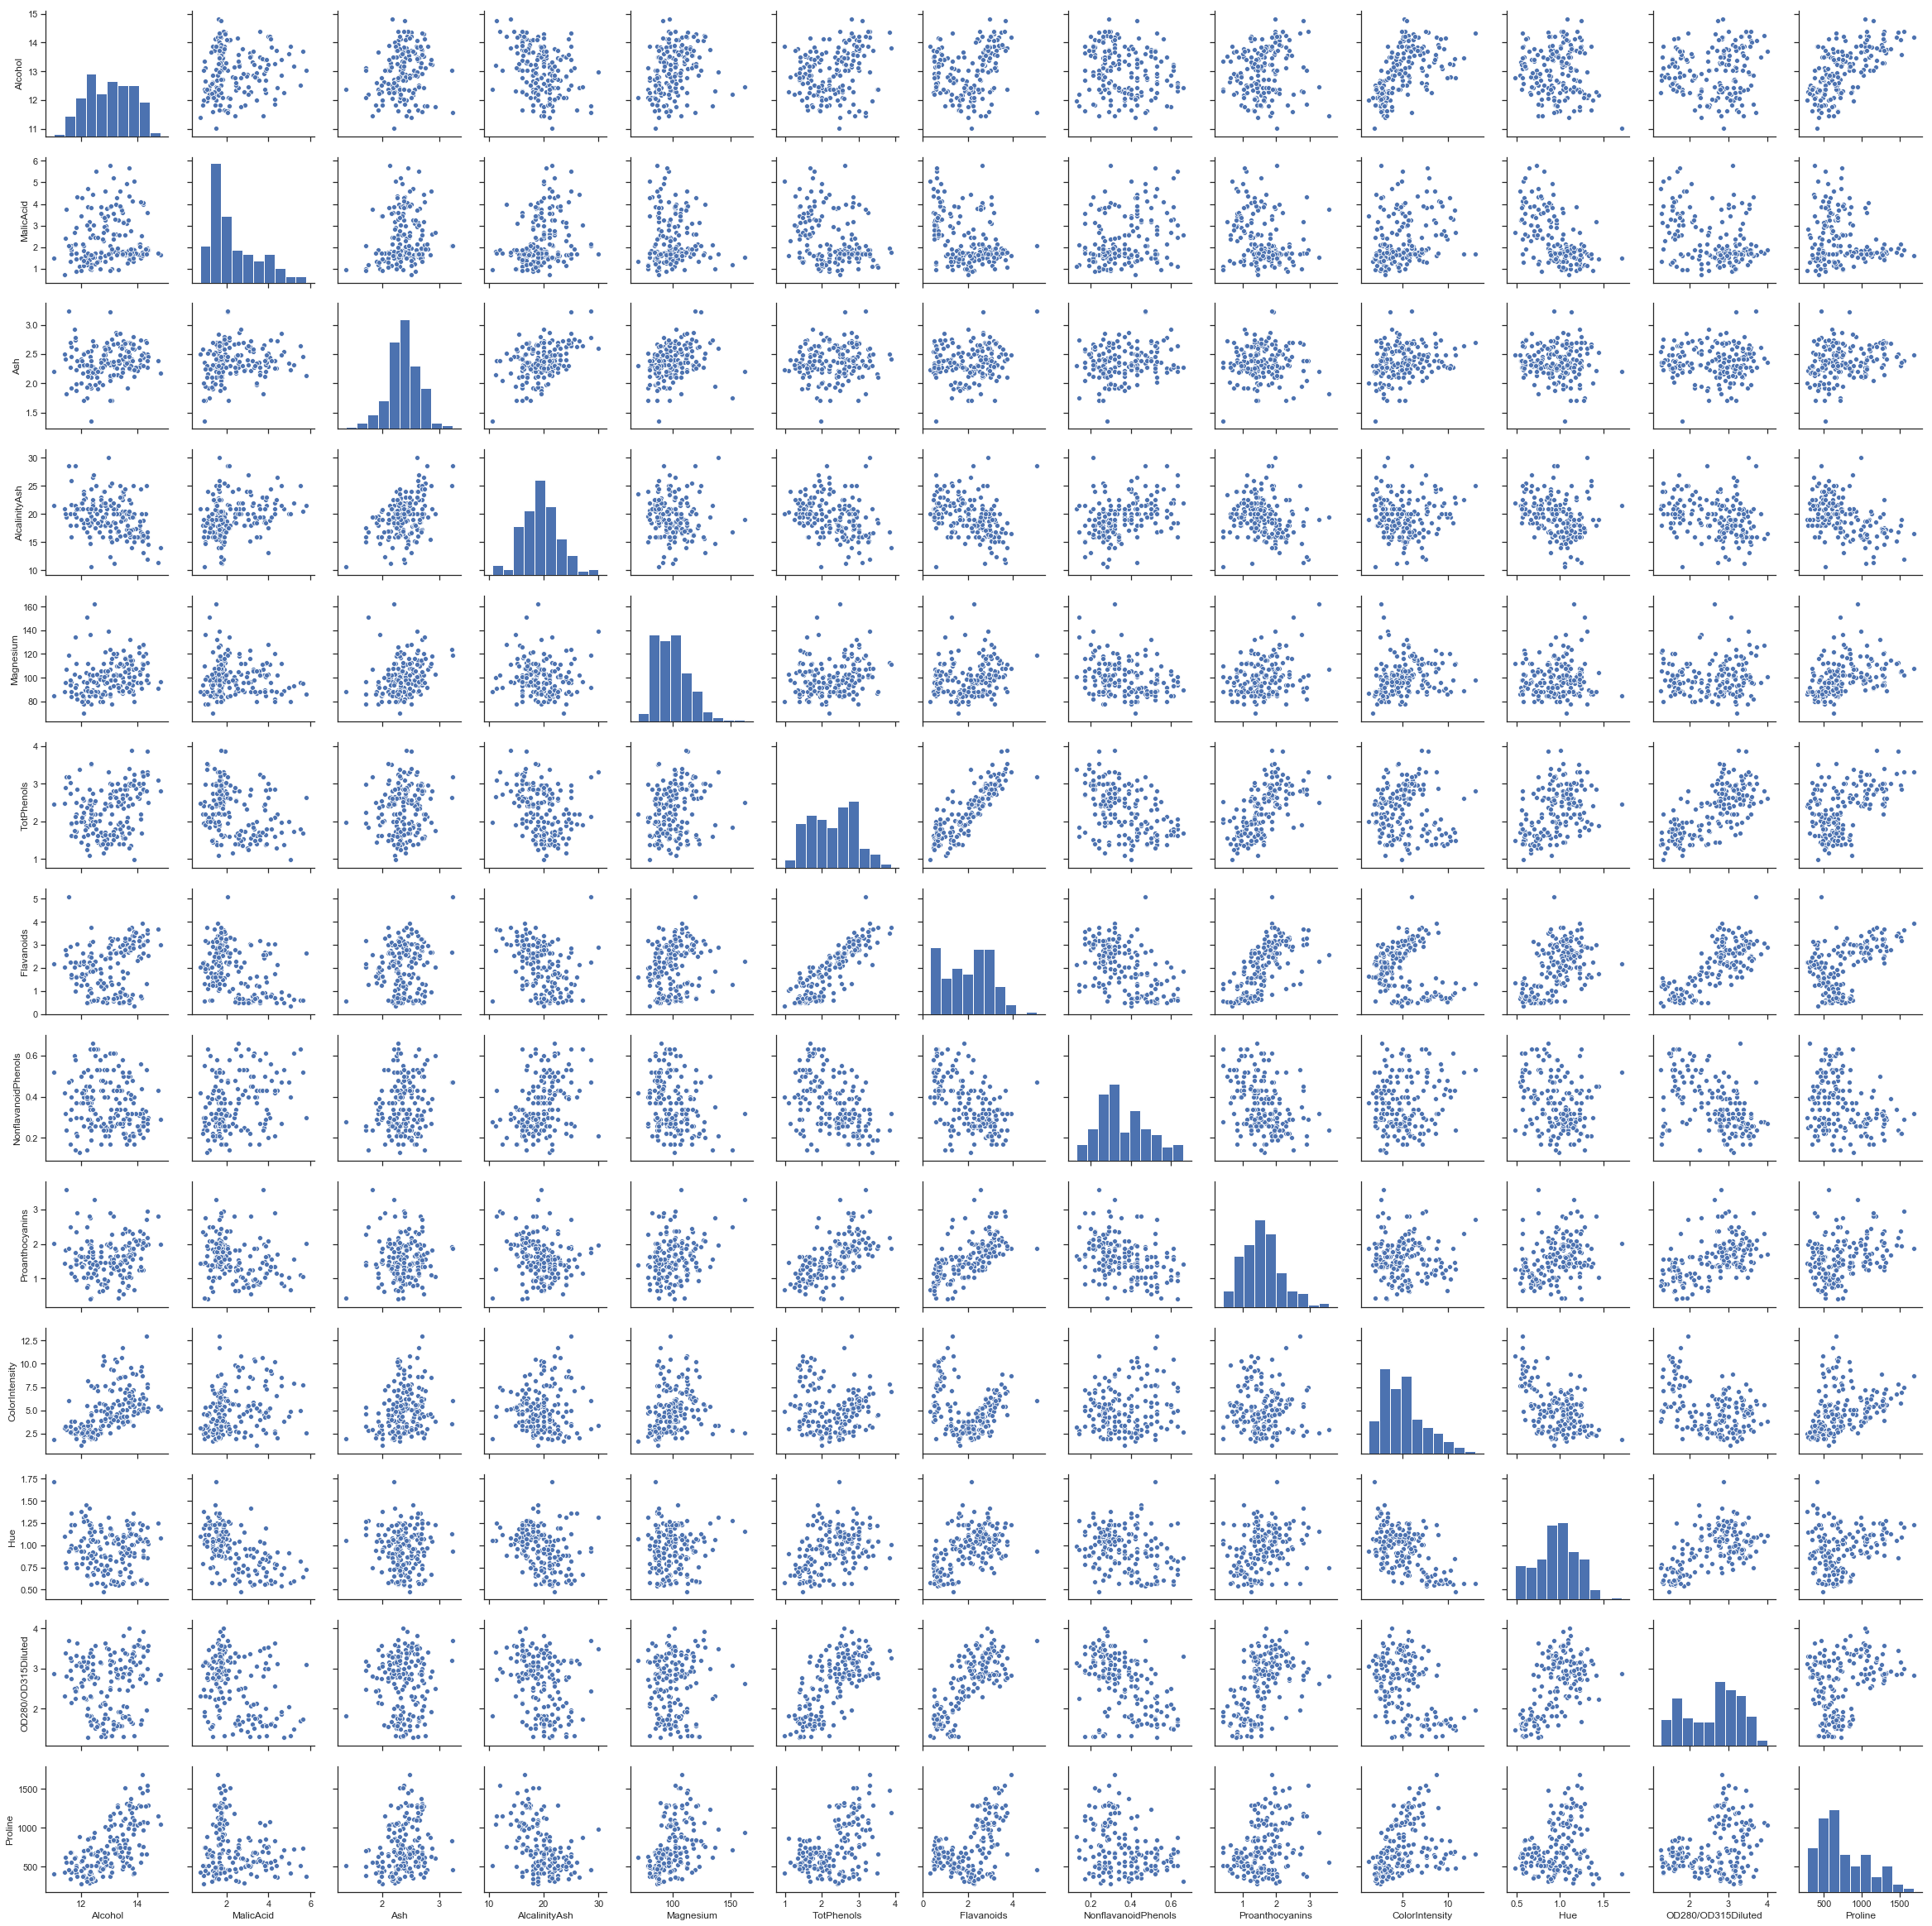

In [210]:
%matplotlib inline
import seaborn as sns

sns.set(context='notebook',style="ticks")
pp = sns.pairplot(df.drop(['Cultivar'], axis=1), diag_kind='hist')


### Exercise 4

+ Create a new pandas DataFrame df_standardized which has the standardized values of each column in df, excluding 'Cultivar'. 
+ Column names of df_standardized match corresponding columns in df
+ Display the summary statistics (i.e. count, mean, std, min, 1st/2nd/3rd quartile, and max) by column for df_standardized

In [211]:
df_standardized = df.drop(['Cultivar'],axis=1)
df_standardized = (df.drop(['Cultivar'],axis=1) - df.drop(['Cultivar'],axis=1).mean())/df.drop(['Cultivar'],axis=1).std()
df_standardized.head()

,Alcohol,MalicAcid,Ash,AlcalinityAsh,Magnesium,TotPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,OD280/OD315Diluted,Proline
0,1.514341,-0.560668,0.231400,-1.166303,1.908522,0.806722,1.031908,-0.657708,1.221438,0.251009,0.361158,1.842721,1.010159
1,0.245597,-0.498009,-0.825667,-2.483841,0.018094,0.567048,0.731565,-0.818411,-0.543189,-0.292496,0.404908,1.110317,0.962526
2,0.196325,0.021172,1.106214,-0.267982,0.088110,0.806722,1.212114,-0.497005,2.129959,0.268263,0.317409,0.786369,1.391224
3,1.686791,-0.345835,0.486554,-0.806975,0.928300,2.484437,1.462399,-0.979113,1.029251,1.182732,-0.426341,1.180741,2.328007
4,0.294868,0.227053,1.835226,0.450674,1.278379,0.806722,0.661485,0.226158,0.400275,-0.318377,0.361158,0.448336,-0.037767


In [212]:
df_standardized.describe()

,Alcohol,MalicAcid,Ash,AlcalinityAsh,Magnesium,TotPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,OD280/OD315Diluted,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,7.823954e-15,2.943962e-16,-4.082876e-15,-5.488743e-17,-7.609394e-17,1.234967e-16,9.580351e-16,-1.635396e-15,-1.666270e-15,-4.216353e-16,1.657850e-15,2.200487e-15,-1.341000e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.427388e+00,-1.428952e+00,-3.668813e+00,-2.663505e+00,-2.082381e+00,-2.101318e+00,-1.691200e+00,-1.862979e+00,-2.063214e+00,-1.629691e+00,-2.088840e+00,-1.889723e+00,-1.488987e+00
25%,-7.860275e-01,-6.568956e-01,-5.705131e-01,-6.871987e-01,-8.220960e-01,-8.829774e-01,-8.252115e-01,-7.380592e-01,-5.956034e-01,-7.928659e-01,-7.654033e-01,-9.495697e-01,-7.824306e-01
50%,6.082829e-02,-4.219218e-01,-2.375431e-02,1.514024e-03,-1.219377e-01,9.568993e-02,1.058511e-01,-1.755994e-01,-6.272092e-02,-1.587767e-01,3.303369e-02,2.370660e-01,-2.330629e-01
75%,8.337767e-01,6.679088e-01,6.961448e-01,6.003946e-01,5.082048e-01,8.067217e-01,8.466967e-01,6.078267e-01,6.274055e-01,4.925666e-01,7.111583e-01,7.863692e-01,7.561165e-01
max,2.253415e+00,3.100446e+00,3.147447e+00,3.145637e+00,4.359076e+00,2.532372e+00,3.054216e+00,2.395645e+00,3.475269e+00,3.425768e+00,3.292407e+00,1.955399e+00,2.963114e+00


### Exercise 5

+ Use sklearn's KMeans to conduct k-means clustering with k = 3 for df_standardized using randomly chosen initial centroids
+ Assign cluster membership to each instance in df_standardized. Save the cluster membership labels of all the instances to a ndarray y_pred1

In [213]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='random', random_state=42).fit(df_standardized)
y_pred1 = kmeans.labels_
df_standardized["cluster_membership"] = y_pred1


In [214]:
y_pred1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

### Exercise 6

Calculate the average silhouette scores across instances within each cluster created in Excercise 5

In [215]:
from sklearn.metrics import silhouette_score
avg_silhouette = silhouette_score(df_standardized, y_pred1, random_state=42)
avg_silhouette

0.31357384642143565

### Exercise 7

Create a silhouette diagram for the k-means clustering completed in Excercise 5

In [216]:
from sklearn.metrics import silhouette_samples
sil_scores = silhouette_samples(df_standardized, y_pred1)


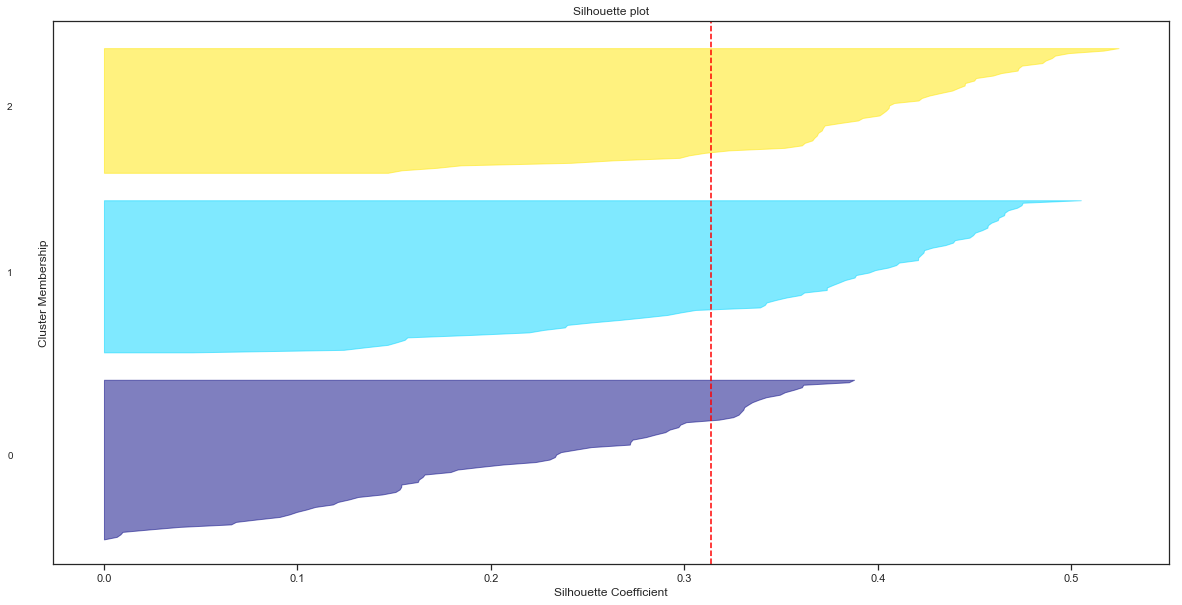

In [217]:
%matplotlib inline

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

labels = [0,1,2]
#setting a lower value for that cluster to start
y_lower=10

fig,ax1 = plt.subplots()
fig.set_size_inches(20, 10)
ax1.set_ylim([0, len(y_pred1) + (len(labels)+ 1) * 10])

for i in labels:
    #for every cluster
    i_sil_scores = sil_scores[y_pred1 == i]
    #sorting
    i_sil_scores.sort()
    i_size_cluster = i_sil_scores.shape[0]
    #where it should end
    y_upper = y_lower + i_size_cluster
    #setting color
    color = cm.jet(float(i) / len(labels))
    #filling in
    ax1.fill_betweenx(np.arange(y_lower, y_upper),0, i_sil_scores,facecolor=color, edgecolor=color, alpha=0.5)
    ax1.text(-0.05, y_lower + 0.5 * i_size_cluster, str(i))
    y_lower = y_upper + 10 

ax1.set_title("Silhouette plot")
ax1.set_xlabel("Silhouette Coefficient")
ax1.set_ylabel("Cluster Membership")

# abg silhouette score line
ax1.axvline(x=avg_silhouette, color="red", linestyle="--")
ax1.set_yticks([]) #clear tick labels
plt.show()
    

### Exercise 8

 + Create an "elbow chart" to determine the optimal number of clusters for df_standardized
 + In the "elbow chart", the cluster inertia is the y axis and the number of clusters is the x axis
 + Determine what the optimal number of clusters would be and explain why

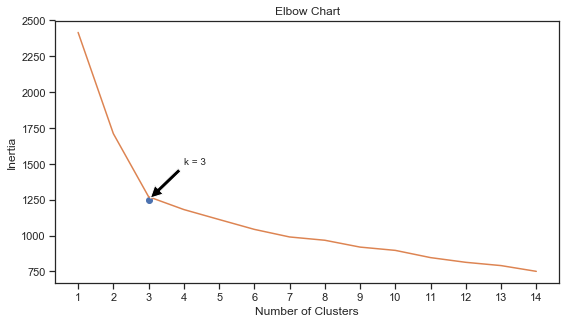

In [218]:
k_max=15
inertia = np.empty([k_max])
k_clusters = np.arange(k_max)
for i in range(1,k_max):
    kmeans1 = KMeans(n_clusters=i, init='random', random_state=42).fit(df_standardized)
    inertia[i] = kmeans1.inertia_
fig, ax = plt.subplots(figsize=(10, 5))
fig.subplots_adjust(bottom=0.15, left=0.2)

ax.set_title("Elbow Chart")
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Inertia')
plt.xticks(np.arange(min(k_clusters), max(k_clusters)+1, 1.0))
ax.annotate('k = 3', xy=(3,1250), xycoords="data", xytext=(4, 1500), arrowprops=dict(facecolor='black', shrink=0.05))
ax.plot([3], [1250], 'o')
ax.plot(k_clusters[1:] , inertia[1:])



### Exercise 9

+ Complete the Python code in myKMeans_Question.py
+ The myKMeans function needs to call all the other functions defined in myKMeans_Question.py
+ Import the myKMeans function from myKMeans_Question.py
+ Conduct the cluster analysis for df_standardized using myKMeans and show the resulting k cluster centroids
+ Compare the cluster centroids myKMeans returns and sklearn's built-in KMeans returns when using the same k and same random state

In [219]:
import myKMeans_Question

In [220]:
#creating another standardized copy
df_test=df_standardized.drop(['cluster_membership'],axis=1)

In [221]:
myK = myKMeans_Question.myKMeans(df_test,3, 42)#using k=3 and seed=42


In [222]:
#Centroids of myKMeans_Question
myK

,Alcohol,MalicAcid,Ash,AlcalinityAsh,Magnesium,TotPhenols,Flavanoids,NonflavanoidPhenols,Proanthocyanins,ColorIntensity,Hue,OD280/OD315Diluted,Proline
0,-0.809187,-0.325357,-0.445682,0.016691,-0.382819,-0.042533,0.065325,-0.088644,0.018055,-0.821111,0.418453,0.258868,-0.629635
1,0.179901,0.946707,0.172168,0.528654,-0.124855,-1.019791,-1.217117,0.678134,-0.811450,0.894803,-1.154596,-1.250630,-0.425183
2,0.884831,-0.380541,0.425803,-0.466558,0.595418,0.913243,0.941278,-0.457534,0.660203,0.298079,0.436378,0.721629,1.164424


In [223]:
#sci-kit centroids
print(kmeans.cluster_centers_)

[[-0.92346686 -0.39293312 -0.49312571  0.17012195 -0.49032869 -0.07576891
   0.02075402 -0.03343924  0.05810161 -0.89937699  0.46050459  0.27000254
  -0.75172566]
 [ 0.83288262 -0.30295508  0.36368014 -0.60847486  0.57596208  0.88274724
   0.975069   -0.56050853  0.57865427  0.17058229  0.47265036  0.77705513
   1.1220202 ]
 [ 0.16444359  0.86909545  0.18637259  0.52289244 -0.07526047 -0.97657548
  -1.21182921  0.72402116 -0.77751312  0.93889024 -1.16151216 -1.28877614
  -0.40594284]]


In [224]:
#distance between the two centroids
((np.array(myK) - kmeans.cluster_centers_)**2).sum(axis=1)**0.5


array([0.29264867, 5.03772286, 4.97079043])

In [225]:
df_test['cluster_membership'] = myKMeans_Question.getLabels(df_test, myK )

In [226]:
#cross tab for myKmeans:
pd.crosstab(df['Cultivar'],df_test['cluster_membership'])

cluster_membership,0,1,2
Cultivar,,,
1,2,0,57
2,65,3,3
3,0,48,0


In [227]:
#crosstab for scikit kmeans
pd.crosstab(df['Cultivar'],df_standardized['cluster_membership'])

cluster_membership,0,1,2
Cultivar,,,
1,0,59,0
2,65,3,3
3,0,0,48


## Note
If we look at the two crosstabs, we'll see that myKmeans is clustering cluster 1 as 2 and vice versa at seed=42. Also, there is difference between two points where it is classiying 1 as 0. As it is interchanging the clustering of the last two clusters, may be that explains the high difference in 2nd and 3rd clusters  centroids' distance from each other[0.29264867, 5.03772286, 4.97079043]. 

### Exercise 10

+ Conduct another k-means cluster analysis on the un-standardized data df, excluding 'Cultivar', with k = 3 using randomly chosen initial centroids
+ Assign cluster membership to each instance in the un-standardized dataset. Save the cluster membership labels of all the instances to a ndarray y_pred2
+ Create a crosstab to compare the resulting clustering membership against the original label 'Cultivar' in df
+ Create another crosstab to compare the clustering membership of Exercise 5 against the original label 'Cultivar' in df

In [228]:
#copy of df without Cultivar
df_test1 = df.drop(['Cultivar'],axis=1)
kmeans3 = KMeans(n_clusters=3, init='random', random_state=42).fit(df_test1)
y_pred2 = kmeans.labels_


In [229]:
df_test1["cluster_membership"] = y_pred2
y_pred2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [230]:
#crosstab comparing y_pred2 with original cultivar
df_test1['cluster_membership'] = df_test1['cluster_membership']+1   #0 to 1, 1 to 2, 2 to 3
pd.crosstab(df['Cultivar'],df_test1['cluster_membership'])

cluster_membership,1,2,3
Cultivar,,,
1,0,59,0
2,65,3,3
3,0,0,48


In [231]:
#crosstab comparing clusters from Exercise 5
df_standardized['cluster_membership'] = df_standardized['cluster_membership']+1  #0 to 1, 1 to 2, 2 to 3
pd.crosstab(df['Cultivar'],df_standardized['cluster_membership'])

cluster_membership,1,2,3
Cultivar,,,
1,0,59,0
2,65,3,3
3,0,0,48


### Exercise 11

+ Use sklearn's AgglomerativeClustering to conduct hierarchical clustering for df_standardized and identify three clusters
+ Assign cluster membership to each instance in the dataset. Save the cluster membership labels of all instances to a ndarray y_pred3

In [232]:
from sklearn.cluster import AgglomerativeClustering
df_test3=df_standardized.drop("cluster_membership", axis=1,errors={'ignore'})
clustering = AgglomerativeClustering(n_clusters=3).fit(df_test3)


In [233]:
ypred3 = np.ndarray(shape=(1,df_test3.size))
ypred3 = clustering.labels_
ypred3

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

### Exercise 12

Leverage the linkage and dendrogram functions of Scipy to create a dendrogram for the hierarchical clustering of df_standardized 

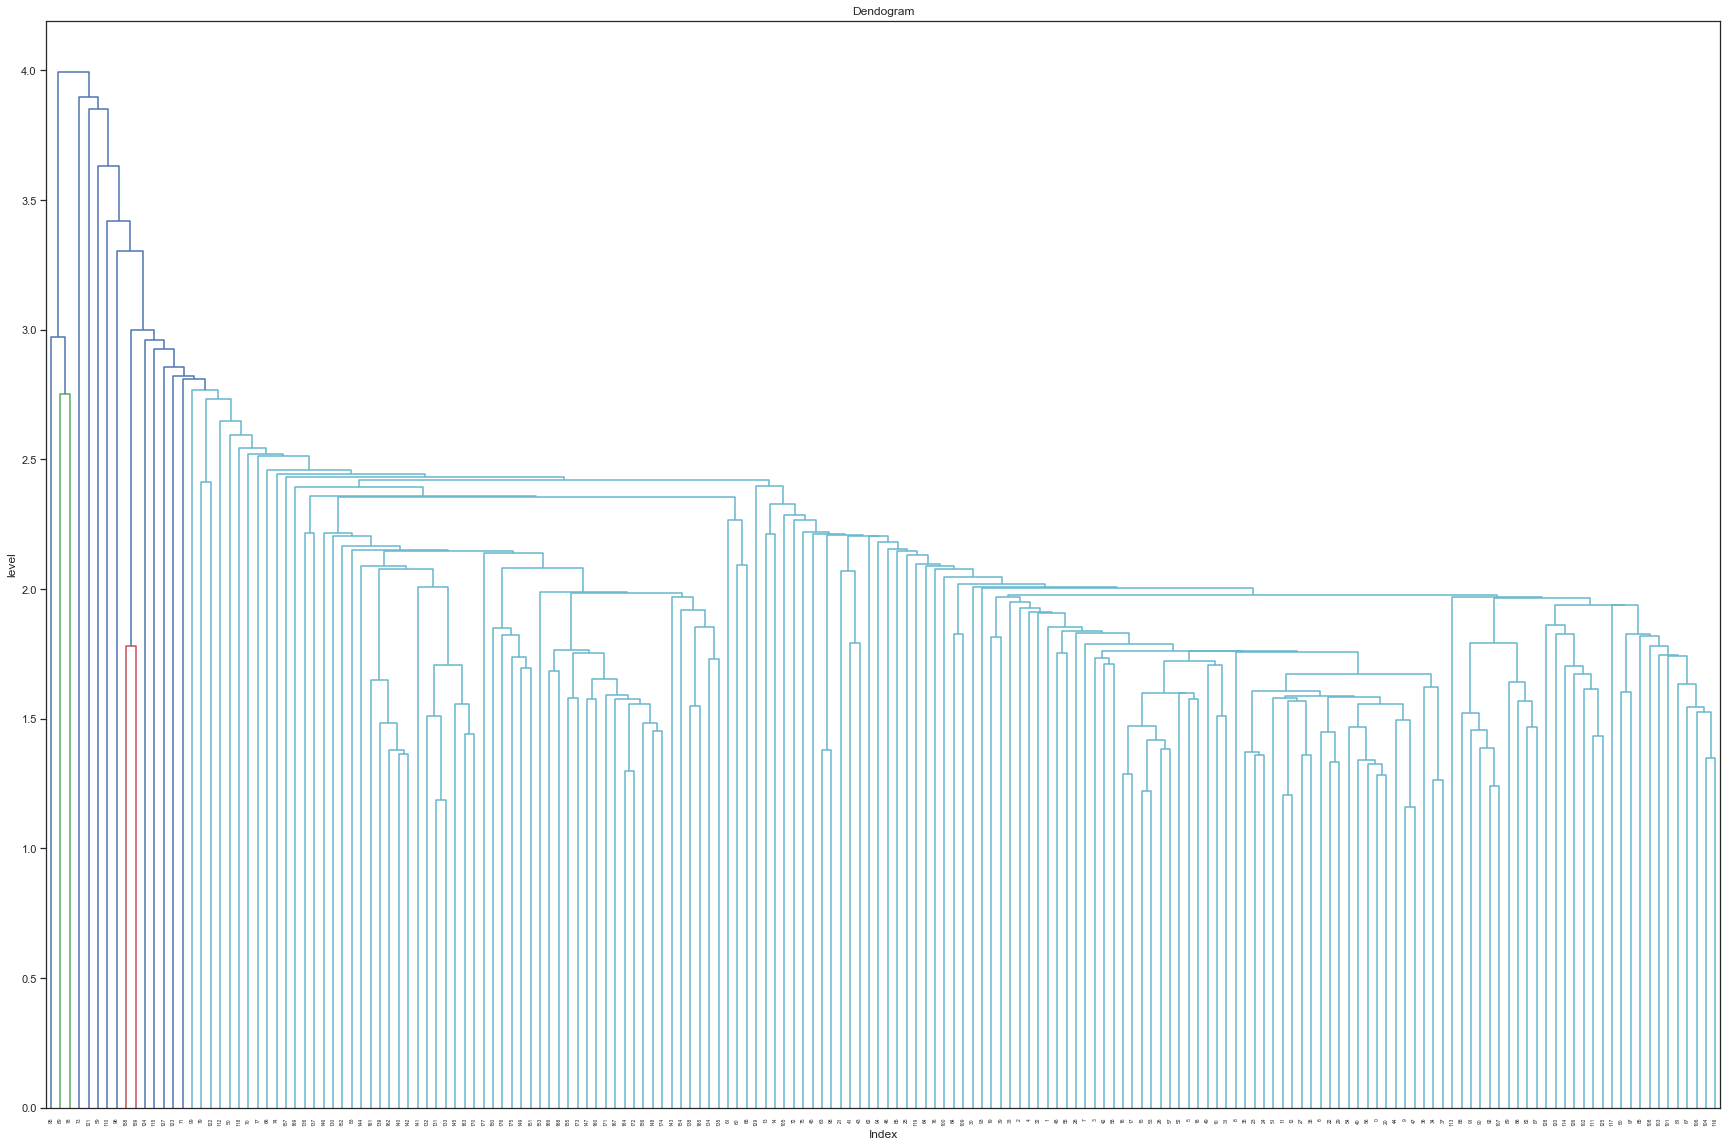

In [234]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(df_test3)
fig, ax1 = plt.subplots()
fig.set_size_inches(30, 20)
ax1.set_title("Dendogram")
ax1.set_xlabel("Index")
ax1.set_ylabel("level")
dendrogram(Z)  
plt.show()

